<a href="https://colab.research.google.com/github/Pyatanandini/Cloudcredits/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [62]:


START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [63]:
data = load_data('AAPL')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.288576,24.757330,23.848702,24.746222,212818400
1,2015-01-05,23.604330,24.137511,23.417718,24.057533,257142000
2,2015-01-06,23.606548,23.866473,23.244429,23.668752,263188400
3,2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600
4,2015-01-08,24.857304,24.915065,24.148618,24.266363,237458000


In [64]:
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-64-e54f1e21f52c>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,24.288576,24.757330,23.848702,24.746222,212818400
1,23.604330,24.137511,23.417718,24.057533,257142000
2,23.606548,23.866473,23.244429,23.668752,263188400
3,23.937572,24.037543,23.704305,23.815385,160423600
4,24.857304,24.915065,24.148618,24.266363,237458000


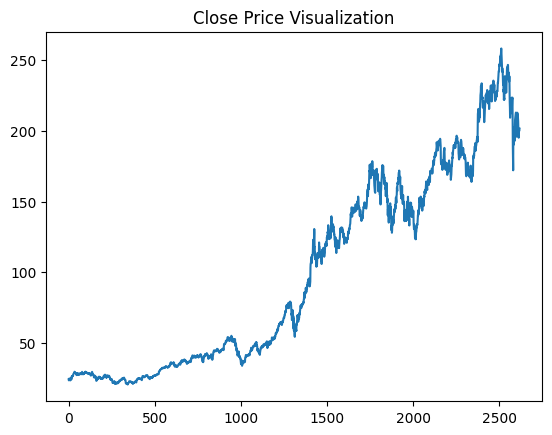

In [65]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [66]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,24.288576,24.757330,23.848702,24.746222,212818400
1,23.604330,24.137511,23.417718,24.057533,257142000
2,23.606548,23.866473,23.244429,23.668752,263188400
3,23.937572,24.037543,23.704305,23.815385,160423600
4,24.857304,24.915065,24.148618,24.266363,237458000
...,...,...,...,...,...
2614,200.210007,200.740005,197.429993,198.300003,56288500
2615,200.419998,202.729996,199.899994,200.589996,45339700
2616,199.949997,203.809998,198.509995,203.580002,51396800


# Plotting moving averages of 100 day

---



In [67]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2614,220.246138
2615,219.752164
2616,219.319032
2617,218.899789


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

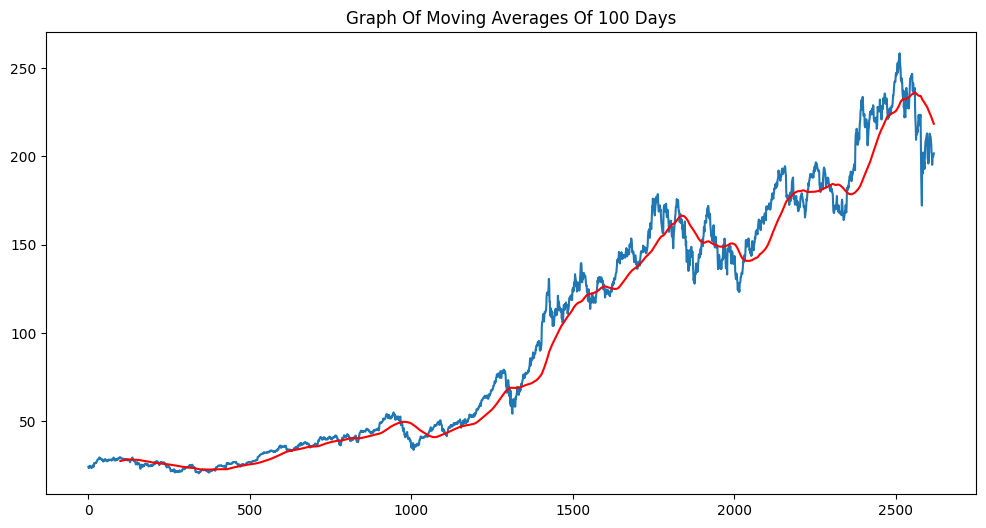

In [68]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [69]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2614,225.359450
2615,225.299965
2616,225.223548
2617,225.143958


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

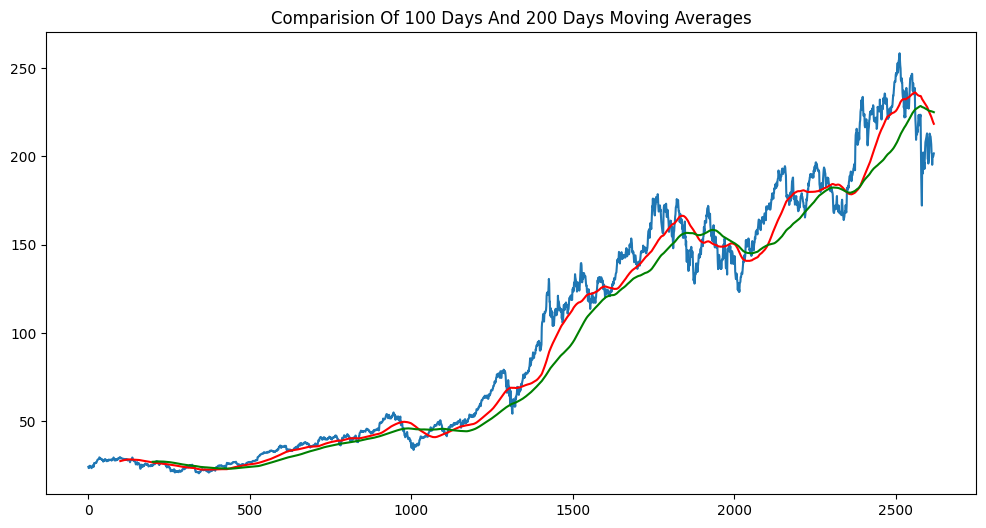

In [70]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [71]:
df.shape

(2619, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [72]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1833, 6)
(786, 6)


In [73]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.288576,24.757330,23.848702,24.746222,212818400
1,2015-01-05,23.604330,24.137511,23.417718,24.057533,257142000
2,2015-01-06,23.606548,23.866473,23.244429,23.668752,263188400
3,2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600
4,2015-01-08,24.857304,24.915065,24.148618,24.266363,237458000


In [74]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
1833,2022-04-13,167.463333,168.092303,163.895902,164.505213,70618900
1834,2022-04-14,162.441422,168.318374,162.195730,167.679567,75329400
1835,2022-04-18,162.225204,163.728835,160.751055,161.095014,69023900
1836,2022-04-19,164.515015,164.927790,161.085171,162.176042,67723800
1837,2022-04-20,164.347977,165.969550,163.237461,165.851608,67929800


# Using MinMax scaler for normalization of the dataset

---



In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [76]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [77]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.02631933],
       [0.02197934],
       [0.01952932],
       ...,
       [0.93424294],
       [0.91522986],
       [0.91095645]])

In [78]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [79]:
x_train.shape
# Define x_test and y_test before using them in model.fit
past_100_days = pd.DataFrame(train_close[-100:])
test_df = pd.DataFrame(test_close)
# Use pd.concat() instead of .append() to concatenate dataframes
final_df = pd.concat([past_100_days, test_df], ignore_index = True)
input_data = scaler.fit_transform(final_df)

x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(786, 100, 1)
(786,)


In [80]:
x_train.shape
# Define x_test and y_test before using them in model.fit
past_100_days = pd.DataFrame(train_close[-100:])
test_df = pd.DataFrame(test_close)
# Use pd.concat() instead of .append() to concatenate dataframes
final_df = pd.concat([past_100_days, test_df], ignore_index = True)
input_data = scaler.fit_transform(final_df)

x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(786, 100, 1)
(786,)


# ML Model (LSTM)

---



In [81]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [82]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [83]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [84]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 50)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 171ms/step - MAE: 0.1550 - loss: 0.0597 - val_MAE: 0.0687 - val_loss: 0.0073
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - MAE: 0.0676 - loss: 0.0118 - val_MAE: 0.0690 - val_loss: 0.0071
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - MAE: 0.0512 - loss: 0.0062 - val_MAE: 0.0652 - val_loss: 0.0064
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - MAE: 0.0425 - loss: 0.0047 - val_MAE: 0.0633 - val_loss: 0.0063
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - MAE: 0.0453 - loss: 0.0055 - val_MAE: 0.0632 - val_loss: 0.0062
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - MAE: 0.0464 - loss: 0.0053 - val_MAE: 0.0647 - val_loss: 0.0063
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - MAE: 0.0402 - loss: 0.0046 - val_MAE: 0.0692 - val_loss: 0.0072
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - MAE: 0.0407 - loss: 0.0043 - val_MAE: 0.0623 - val_loss: 0.0059
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - MAE: 0.04

In [85]:
model.save('keras_model.h5')

In [86]:

test_close.shape
test_close

array([[164.50521264],
       [167.67956725],
       [161.09501448],
       [162.17604188],
       [165.85160767],
       [165.99903403],
       [163.59127093],
       [158.34325919],
       [159.45383654],
       [153.22307484],
       [156.50549702],
       [159.05086745],
       [154.00928951],
       [155.42442586],
       [156.91824346],
       [161.02623866],
       [153.54661874],
       [152.48364388],
       [153.0643437 ],
       [151.07620573],
       [140.51565065],
       [142.30692638],
       [143.25177981],
       [146.50950978],
       [144.53126736],
       [137.67127835],
       [136.8937958 ],
       [135.61430622],
       [138.58659874],
       [136.24418293],
       [135.22061823],
       [143.09431328],
       [146.71623208],
       [147.53309012],
       [145.49575338],
       [144.58046123],
       [144.70842021],
       [142.070736  ],
       [146.23389301],
       [144.75762101],
       [138.06497716],
       [130.77198099],
       [131.02787945],
       [132

In [87]:
past_100_days = pd.DataFrame(train_close[-100:])

In [88]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [89]:
# Use pd.concat() instead of .append() to concatenate dataframes
final_df = pd.concat([past_100_days, test_df], ignore_index = True)
final_df.head()

,0
0,150.868765
1,154.735902
2,158.691444
3,158.141805
4,157.778634


In [90]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.19876977],
       [0.22780885],
       [0.25751178],
       [0.25338443],
       [0.25065731],
       [0.24196037],
       [0.24048598],
       [0.24505577],
       [0.30026015],
       [0.23584272],
       [0.2747585 ],
       [0.27674816],
       [0.31205259],
       [0.33453235],
       [0.35502192],
       [0.35723303],
       [0.40079238],
       [0.35752775],
       [0.35649598],
       [0.38723057],
       [0.31831753],
       [0.30615645],
       [0.33033119],
       [0.34123936],
       [0.36195006],
       [0.3710894 ],
       [0.39371657],
       [0.38759925],
       [0.3886307 ],
       [0.37845985],
       [0.37654332],
       [0.4119214 ],
       [0.38966285],
       [0.33873363],
       [0.34013379],
       [0.31205253],
       [0.33593274],
       [0.36394015],
       [0.36143412],
       [0.32870958],
       [0.32996261],
       [0.31883328],
       [0.29657449],
       [0.27770667],
       [0.24527677],
       [0.23761162],
       [0.27092604],
       [0.263

In [91]:
input_data.shape

(886, 1)

# Testing the model

---



In [92]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [93]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(786, 100, 1)
(786,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [94]:
# Making predictions

y_pred = model.predict(x_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step


In [95]:
y_pred.shape

(786, 1)

In [96]:
y_test

array([0.30116848, 0.32500533, 0.27556065, 0.28367829, 0.31127882,
       0.31238588, 0.29430552, 0.25489719, 0.26323673, 0.21644874,
       0.24109708, 0.26021075, 0.22235257, 0.2329791 , 0.24419647,
       0.2750442 , 0.21887829, 0.21089621, 0.21525679, 0.20032748,
       0.12102624, 0.13447727, 0.14157236, 0.16603528, 0.15118028,
       0.0996673 , 0.09382903, 0.08422109, 0.10654061, 0.08895096,
       0.08126482, 0.14038991, 0.1675876 , 0.17372154, 0.15842279,
       0.15154968, 0.15251055, 0.13270367, 0.16396562, 0.15288001,
       0.10262366, 0.04785914, 0.04978073, 0.05835376, 0.04202056,
       0.02716547, 0.05192411, 0.06204933, 0.07705236, 0.09981526,
       0.12050903, 0.11629645, 0.08178217, 0.08023005, 0.07128734,
       0.08407326, 0.11053174, 0.1248695 , 0.13942904, 0.14245916,
       0.14312423, 0.12265241, 0.13070813, 0.17283457, 0.17992974,
       0.15908811, 0.18273785, 0.20771813, 0.21429602, 0.20409696,
       0.19116326, 0.19352838, 0.22604714, 0.25753122, 0.25583

In [97]:
y_pred

array([[0.3683496 ],
       [0.3654917 ],
       [0.3606332 ],
       [0.35417444],
       [0.34658092],
       [0.33848011],
       [0.33048737],
       [0.3230173 ],
       [0.31612962],
       [0.30982298],
       [0.30398944],
       [0.29859948],
       [0.2936881 ],
       [0.28923613],
       [0.28522184],
       [0.28166425],
       [0.27865502],
       [0.2761504 ],
       [0.27390736],
       [0.27168685],
       [0.26922962],
       [0.26580805],
       [0.2611029 ],
       [0.2549974 ],
       [0.247695  ],
       [0.23953   ],
       [0.23089197],
       [0.22225404],
       [0.21361889],
       [0.20517395],
       [0.19675288],
       [0.18841454],
       [0.18039834],
       [0.1730553 ],
       [0.16677529],
       [0.16178796],
       [0.15812661],
       [0.15564552],
       [0.15421955],
       [0.15373054],
       [0.1540272 ],
       [0.15489268],
       [0.15600327],
       [0.1569837 ],
       [0.15750256],
       [0.15729457],
       [0.15614636],
       [0.153

In [98]:
scaler.scale_

array([0.00750919])

In [99]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

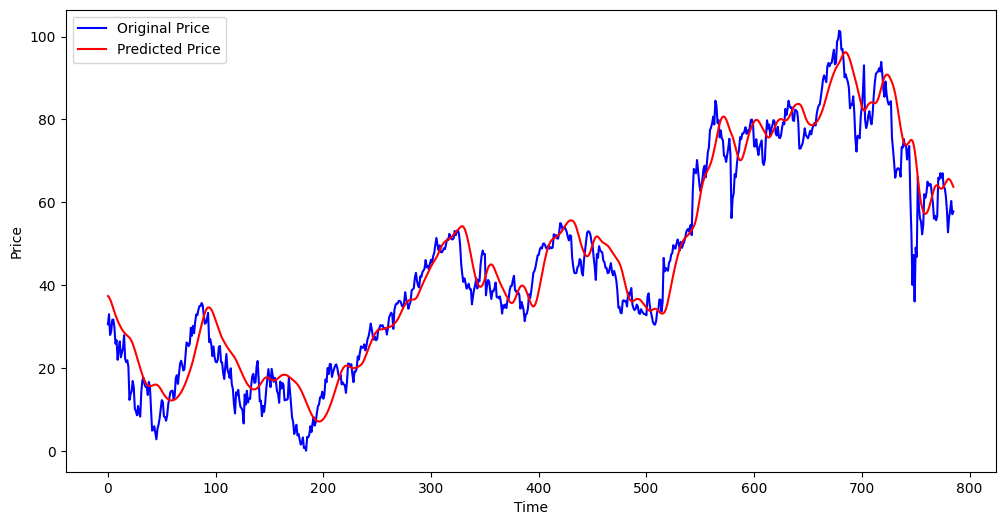

In [100]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model evaluation

In [101]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  4.943113745566079
